![tower_bridge](tower_bridge.jpeg)

As the climate changes, predicting the weather becomes ever more important for businesses. Since the weather depends on a lot of different factors, you will want to run a lot of experiments to determine what the best approach is to predict the weather. In this project, you will run experiments for different regression models predicting the mean temperature, using a combination of `sklearn` and `MLflow`.

You will be working with data stored in `london_weather.csv`, which contains the following columns:
- **date** - recorded date of measurement - (**int**)
- **cloud_cover** - cloud cover measurement in oktas - (**float**)
- **sunshine** - sunshine measurement in hours (hrs) - (**float**)
- **global_radiation** - irradiance measurement in Watt per square meter (W/m2) - (**float**)
- **max_temp** - maximum temperature recorded in degrees Celsius (°C) - (**float**)
- **mean_temp** - mean temperature in degrees Celsius (°C) - (**float**)
- **min_temp** - minimum temperature recorded in degrees Celsius (°C) - (**float**)
- **precipitation** - precipitation measurement in millimeters (mm) - (**float**)
- **pressure** - pressure measurement in Pascals (Pa) - (**float**)
- **snow_depth** - snow depth measurement in centimeters (cm) - (**float**)

'Aperçu des données'

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


'Types de variables'

date                  int64
cloud_cover         float64
sunshine            float64
global_radiation    float64
max_temp            float64
mean_temp           float64
min_temp            float64
precipitation       float64
pressure            float64
snow_depth          float64
dtype: object

'Valeurs manquantes'

date                   0
cloud_cover           19
sunshine               0
global_radiation      19
max_temp               6
mean_temp             36
min_temp               2
precipitation          6
pressure               4
snow_depth          1441
dtype: int64

'Nombre de doublons'

np.int64(0)

'Shape du dataset (lignes, colonnes)'

(15341, 10)

'Exploration des distributions numériques'

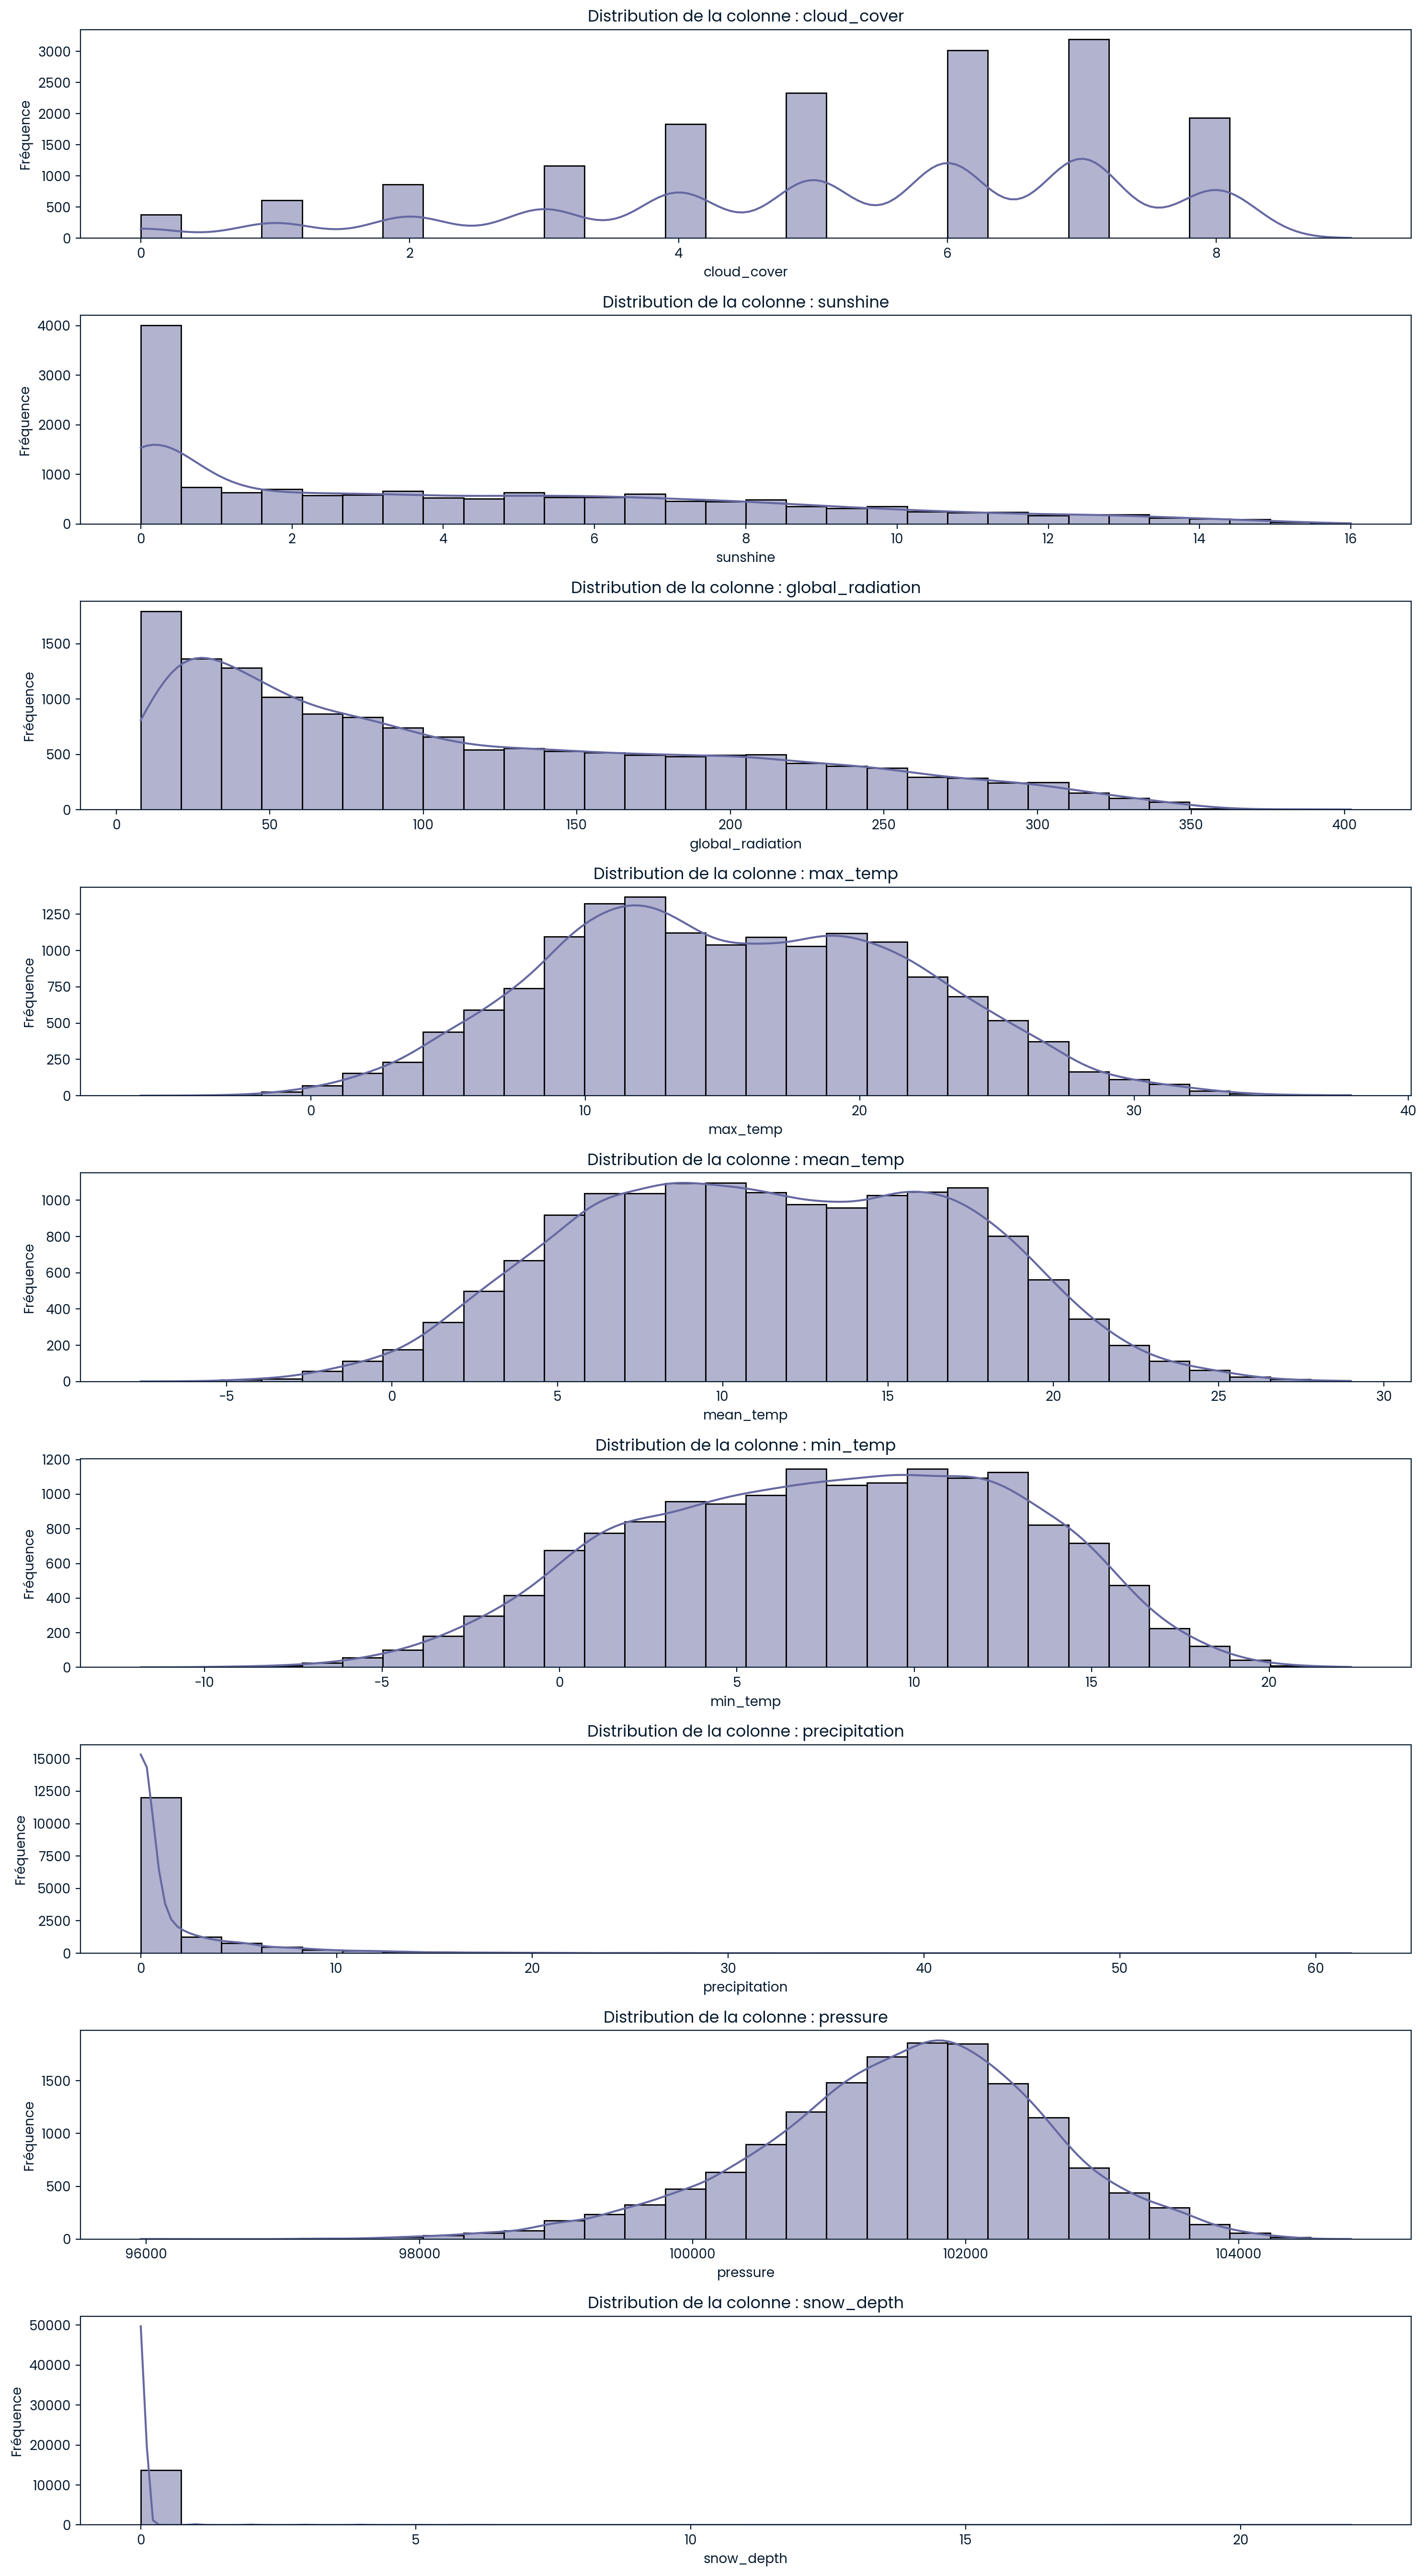

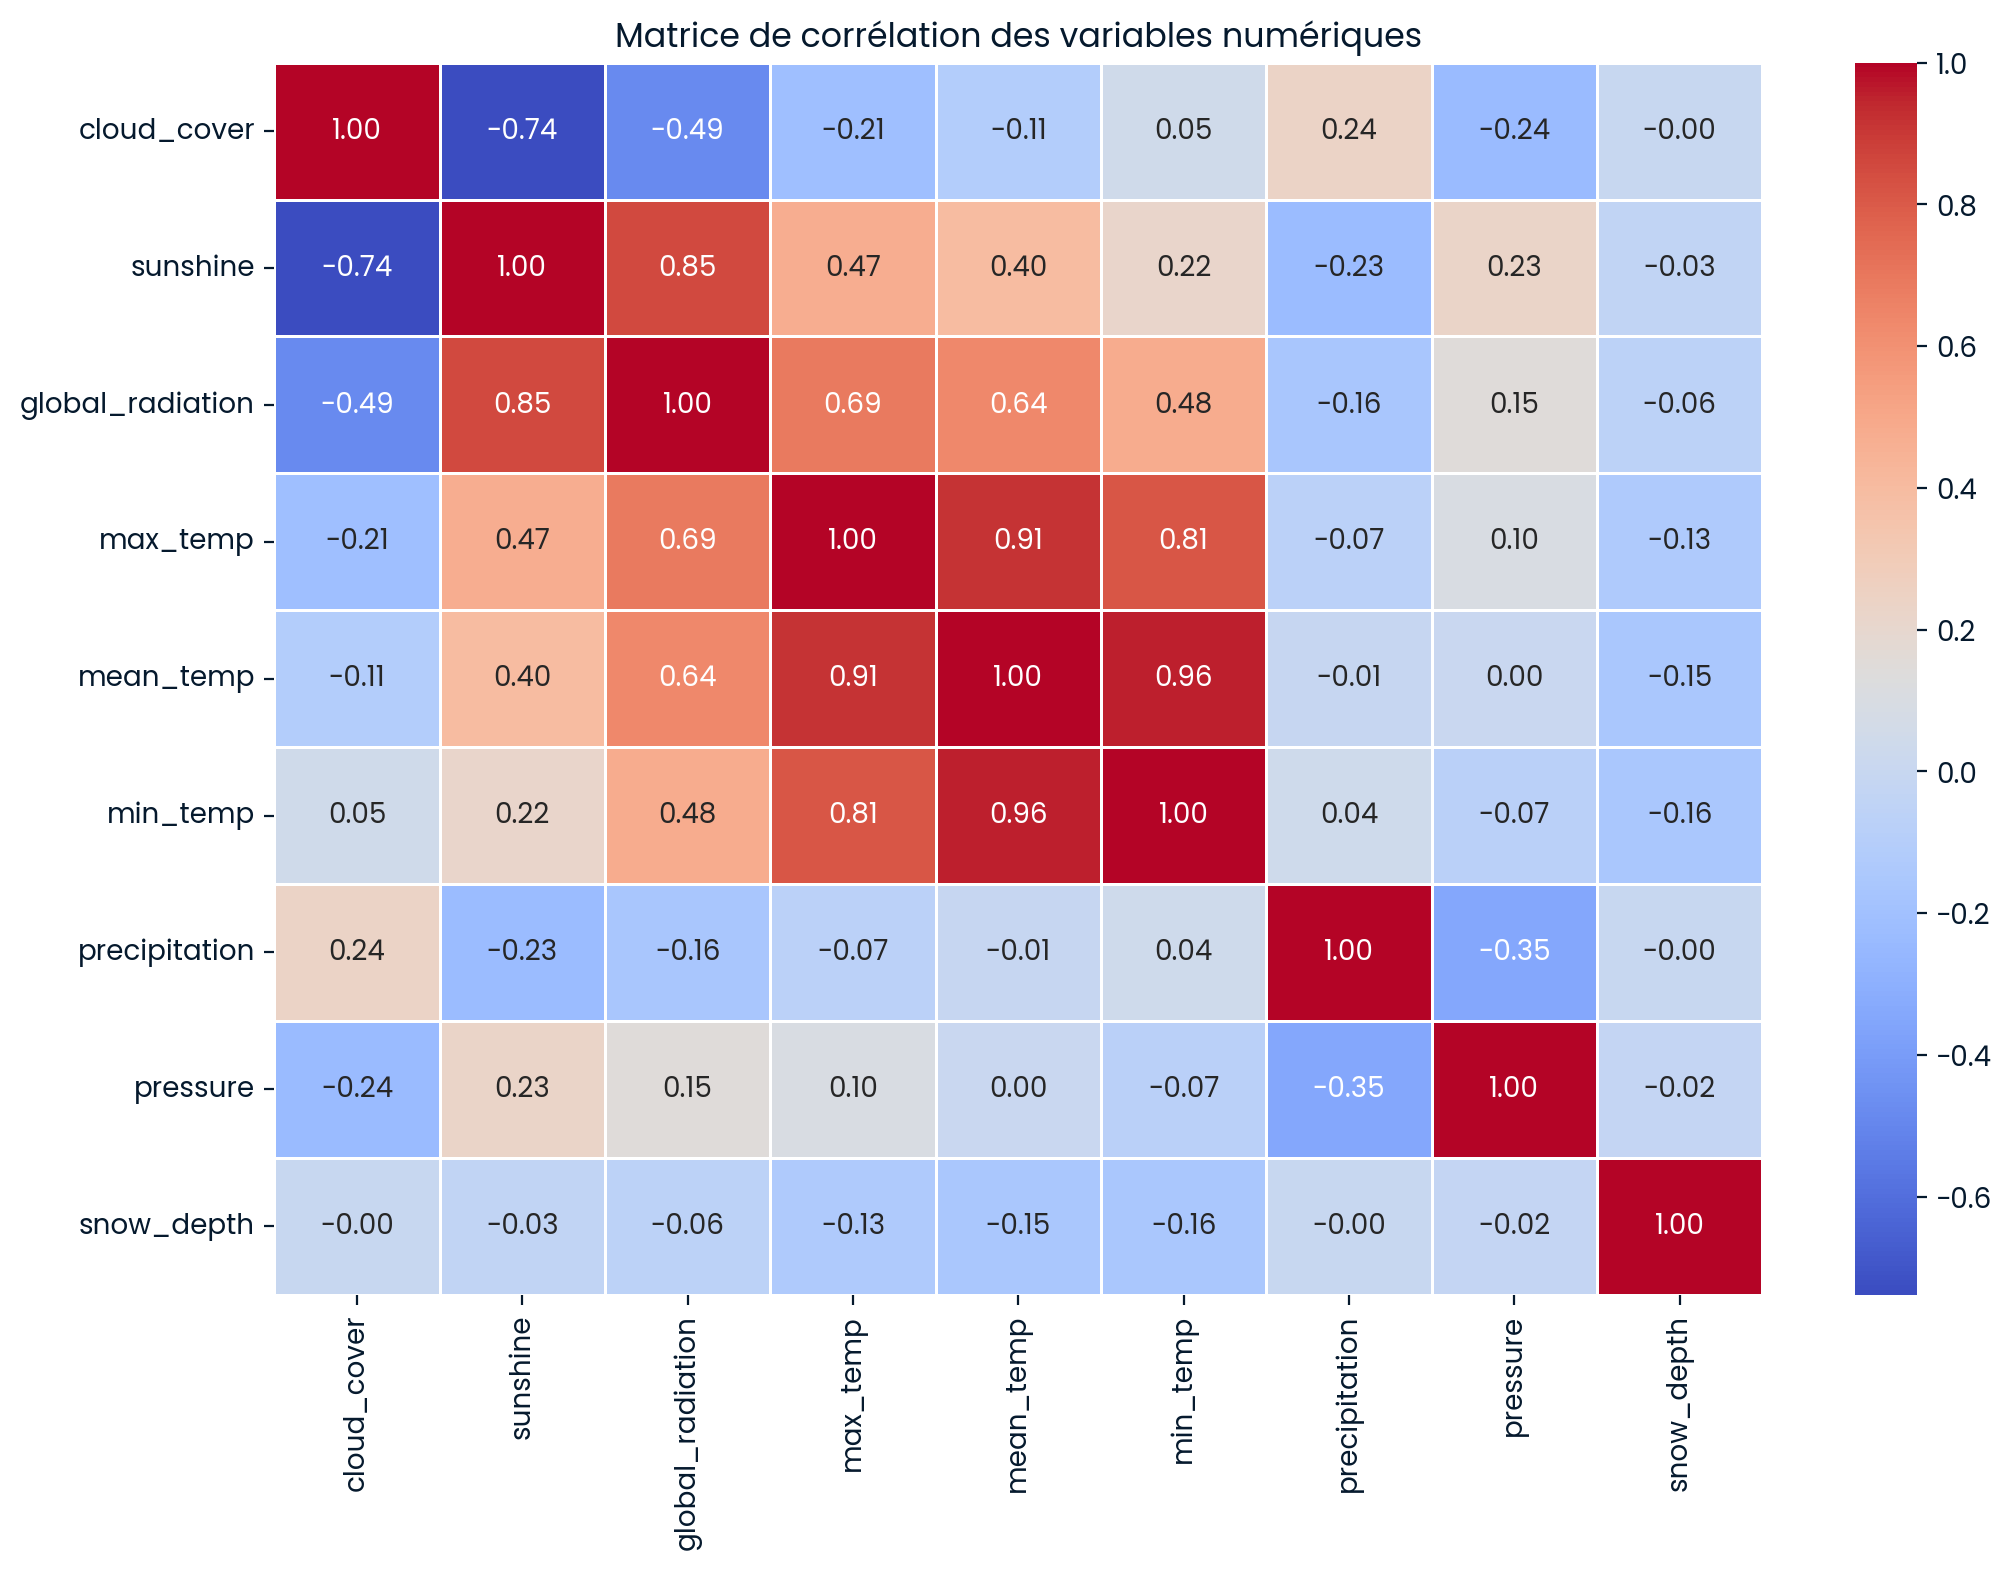

'Basing on correlation matrix, the features for each models are: \n LinearRegression: min_temp, global_radiation \n DecisionTreeRegressor: min_temp, max_temp, global_radiation, sunshine \n RandomForestRegressor: min_temp, max_temp, global_radiation, sunshine, cloud_cover, precipitation, pressure, snow_depth'

Score RMSE pour le modèle LinearRegression : 1.2506280146360156


2025/12/06 06:22:48 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/06 06:22:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Score RMSE pour le modèle DecisionTreeRegressor : 1.2842791864149488


2025/12/06 06:23:07 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/06 06:23:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Score RMSE pour le modèle RandomForestRegressor : 0.9132104852651856


2025/12/06 06:23:32 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/06 06:23:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.test_rmse,metrics.training_root_mean_squared_error,metrics.training_mean_absolute_error,metrics.mean_squared_error_X_rfr_test,metrics.training_score,metrics.training_mean_squared_error,metrics.training_r2_score,metrics.mean_squared_error_X_dtr_test,metrics.mean_squared_error_X_lr_test,params.random_forest_regressor__min_impurity_decrease,params.random_forest_regressor__n_estimators,params.memory,params.scaler__with_std,params.random_forest_regressor__monotonic_cst,params.imputation__keep_empty_features,params.random_forest_regressor__max_features,params.steps,params.scaler__copy,params.random_forest_regressor__max_leaf_nodes,params.random_forest_regressor__min_samples_leaf,params.random_forest_regressor__max_samples,params.random_forest_regressor__min_weight_fraction_leaf,params.random_forest_regressor__oob_score,params.random_forest_regressor__warm_start,params.random_forest_regressor__n_jobs,params.random_forest_regressor__criterion,params.random_forest_regressor__min_samples_split,params.transform_input,params.imputation__copy,params.imputation__strategy,params.model_type,params.imputation__missing_values,params.verbose,params.imputation__fill_value,...,params.preprocess__transformer_weights,params.linear_regression__positive,params.preprocess__n_jobs,params.preprocess__median_imputer_global_rad__missing_values,params.preprocess__mean_imputer_min_temp__fill_value,params.preprocess__median_imputer_global_rad__fill_value,params.preprocess__force_int_remainder_cols,params.preprocess__verbose_feature_names_out,params.preprocess__median_imputer_global_rad__add_indicator,params.preprocess__remainder,params.preprocess__verbose,params.preprocess__mean_imputer_min_temp__strategy,params.preprocess__mean_imputer_min_temp__missing_values,params.min_impurity_decrease,params.min_samples_leaf,params.ccp_alpha,params.criterion,params.max_features,params.monotonic_cst,params.max_leaf_nodes,params.n_estimators,params.random_state,params.min_samples_split,params.max_samples,params.n_jobs,params.max_depth,params.min_weight_fraction_leaf,params.bootstrap,params.oob_score,params.splitter,params.copy_X,params.fit_intercept,params.tol,params.positive,tags.estimator_name,tags.mlflow.source.name,tags.mlflow.user,tags.mlflow.runName,tags.mlflow.source.type,tags.estimator_class
0,fb52f6b227c94784a2c9632d2bc00586,794485988681723025,FINISHED,file:///work/files/workspace/mlruns/7944859886...,2025-12-06 06:23:15.979000+00:00,2025-12-06 06:23:41.190000+00:00,0.913210,0.346019,0.255084,0.833953,0.996341,0.119729,0.996341,NaN,NaN,0.0,100,None,True,None,False,1.0,"[('imputation', SimpleImputer()), ('scaler', S...",True,None,1,None,0.0,False,False,None,squared_error,2,None,True,mean,RandomForestRegressor,nan,False,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Pipeline,/home/repl/.venv-user/lib/python3.12/site-pack...,repl,RandomForest_all_features,LOCAL,sklearn.pipeline.Pipeline
1,947e3026ab4e415eba5f10126791b171,794485988681723025,FINISHED,file:///work/files/workspace/mlruns/7944859886...,2025-12-06 06:22:57.451000+00:00,2025-12-06 06:23:15.888000+00:00,1.284279,0.034941,0.001155,NaN,0.999963,0.001221,0.999963,1.649373,NaN,None,None,None,True,None,False,None,"[('imputation', SimpleImputer()), ('scaler', S...",True,None,None,None,None,None,None,None,None,None,None,True,mean,DecisionTreeRegressor,nan,False,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Pipeline,/home/repl/.venv-user/lib/python3.12/site-pack...,repl,DecisionTreeRegressor_selected_features,LOCAL,sklearn.pipeline.Pipeline
2,f356edb21b904f3e866910f9c340bb19,794485988681723025,FINISHED,file:///work/files/workspace/mlruns/7944859886...,2025-12-06 06:22:37.847000+00:00,202

In [14]:
# =========================
# 0. Imports
# =========================
import pandas as pd
import numpy as np

import mlflow
import mlflow.sklearn

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# =========================
# 1. Chargement des données
# =========================
weather = pd.read_csv("../../../../Downloads/london_weather.csv")

display("Aperçu des données")
display(weather.head())

display("Types de variables")
display(weather.dtypes)

display("Valeurs manquantes")
display(weather.isnull().sum())

display("Nombre de doublons")
display(weather.duplicated().sum())

display("Shape du dataset (lignes, colonnes)")
display(weather.shape)

# =========================
# 2. Exploration simple
# =========================

display("Exploration des distributions numériques")

# On enlève 'date' si elle existe
cols_to_drop = [col for col in ["date"] if col in weather.columns]
df = weather.drop(cols_to_drop, axis=1)

numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(15, len(numeric_cols) * 3))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution de la colonne : {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")

plt.tight_layout()
plt.show()

# Matrice de corrélation
corr = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Matrice de corrélation des variables numériques")
plt.show()

display(
    "Basing on correlation matrix, the features for each models are: \n"
    " LinearRegression: min_temp, global_radiation \n"
    " DecisionTreeRegressor: min_temp, max_temp, global_radiation, sunshine \n"
    " RandomForestRegressor: min_temp, max_temp, global_radiation, sunshine, cloud_cover, precipitation, pressure, snow_depth"
)

# LinearRegression is sensitive to correlated features
# DecisionTreeRegressor and RandomForestRegressor are not affected by correlated features
# RandomForestRegressor is also robust to irrelevant features (therefore, we will keep all features except the 'date' column)


# =========================
# 3. Configuration MLflow
# =========================

# Active l'autolog pour scikit-learn
mlflow.sklearn.autolog()

# Un seul experiment pour les 3 modèles
mlflow.set_experiment("weather_mean_temp_models")

# Cible commune : mean_temp (avec imputation simple par moyenne)
target = "mean_temp"
y = weather[target].fillna(weather[target].mean()).values


# =========================
# 4. Linear Regression
# =========================

# Features choisies
lr_features = ["min_temp", "global_radiation"]
X_lr = weather[lr_features]

# Préprocesseur spécifique pour LR
lr_preprocessing = ColumnTransformer(
    transformers=[
        ("mean_imputer_min_temp", SimpleImputer(strategy="mean"), ["min_temp"]),
        ("median_imputer_global_rad", SimpleImputer(strategy="median"), ["global_radiation"]),
    ],
    remainder="passthrough",
)

lr_pipeline = Pipeline(
    steps=[
        ("preprocess", lr_preprocessing),
        ("scaler", StandardScaler()),
        ("linear_regression", LinearRegression()),
    ]
)

X_lr_train, X_lr_test, y_lr_train, y_lr_test = train_test_split(
    X_lr, y, test_size=0.3, random_state=42
)

with mlflow.start_run(run_name="LinearRegression_min_temp_global_rad"):
    # Training
    lr_pipeline.fit(X_lr_train, y_lr_train)

    # Prediction & RMSE
    y_lr_pred = lr_pipeline.predict(X_lr_test)
    # FIX: Remove 'squared' argument for compatibility with older scikit-learn
    lr_rmse = np.sqrt(mean_squared_error(y_lr_test, y_lr_pred))
    print("Score RMSE pour le modèle LinearRegression :", lr_rmse)

    # Log des paramètres et métriques
    # REMOVE: mlflow.log_params(lr_model.get_params()) to avoid duplicate param logging
    lr_model = lr_pipeline.named_steps["linear_regression"]
    mlflow.log_param("model_type", "LinearRegression")
    # mlflow.log_params(lr_model.get_params())  # <-- REMOVE THIS LINE
    mlflow.log_metric("test_rmse", lr_rmse)

    # Log du modèle complet (pipeline)
    mlflow.sklearn.log_model(lr_pipeline, artifact_path="model_linear_regression")


# =========================
# 5. Decision Tree Regressor
# =========================

dtr_features = ["min_temp", "max_temp", "global_radiation", "sunshine"]
X_dtr = weather[dtr_features]
y_dtr = y  # même cible

dtr_pipeline = Pipeline(
    steps=[
        ("imputation", SimpleImputer()),  # par défaut : stratégie "mean"
        ("scaler", StandardScaler()),
        ("decision_tree_regressor", DecisionTreeRegressor(random_state=42)),
    ]
)

X_dtr_train, X_dtr_test, y_dtr_train, y_dtr_test = train_test_split(
    X_dtr, y_dtr, test_size=0.3, random_state=42
)

with mlflow.start_run(run_name="DecisionTreeRegressor_selected_features"):
    # Training
    dtr_pipeline.fit(X_dtr_train, y_dtr_train)

    # Prediction & RMSE
    y_dtr_pred = dtr_pipeline.predict(X_dtr_test)
    # FIX: Remove 'squared' argument for compatibility with older scikit-learn
    dtr_rmse = np.sqrt(mean_squared_error(y_dtr_test, y_dtr_pred))
    print("Score RMSE pour le modèle DecisionTreeRegressor :", dtr_rmse)

    # Log des paramètres et métriques
    # REMOVE: mlflow.log_params(dtr_model.get_params()) to avoid duplicate param logging
    dtr_model = dtr_pipeline.named_steps["decision_tree_regressor"]
    mlflow.log_param("model_type", "DecisionTreeRegressor")
    # mlflow.log_params(dtr_model.get_params())  # <-- REMOVE THIS LINE
    mlflow.log_metric("test_rmse", dtr_rmse)

    # Log du modèle complet
    mlflow.sklearn.log_model(dtr_pipeline, artifact_path="model_decision_tree")


# =========================
# 6. Random Forest Regressor
# =========================

rfr_features = [
    "min_temp", "max_temp", "global_radiation", "sunshine",
    "cloud_cover", "precipitation", "pressure", "snow_depth"
]

# On ne garde que les colonnes qui existent réellement (au cas où)
rfr_features = [f for f in rfr_features if f in weather.columns]

X_rfr = weather[rfr_features]
y_rfr = y  # même cible

rfr_pipeline = Pipeline(
    steps=[
        ("imputation", SimpleImputer()),
        ("scaler", StandardScaler()),
        ("random_forest_regressor", RandomForestRegressor(random_state=42)),
    ]
)

X_rfr_train, X_rfr_test, y_rfr_train, y_rfr_test = train_test_split(
    X_rfr, y_rfr, test_size=0.3, random_state=42
)

with mlflow.start_run(run_name="RandomForest_all_features"):
    # Training
    rfr_pipeline.fit(X_rfr_train, y_rfr_train)

    # Prediction & RMSE
    y_rfr_pred = rfr_pipeline.predict(X_rfr_test)
    # FIX: Remove 'squared' argument for compatibility with older scikit-learn
    rfr_rmse = np.sqrt(mean_squared_error(y_rfr_test, y_rfr_pred))
    print("Score RMSE pour le modèle RandomForestRegressor :", rfr_rmse)

    # Log des paramètres et métriques
    # REMOVE: mlflow.log_params(rfr_model.get_params()) to avoid duplicate param logging
    rfr_model = rfr_pipeline.named_steps["random_forest_regressor"]
    mlflow.log_param("model_type", "RandomForestRegressor")
    # mlflow.log_params(rfr_model.get_params())  # <-- REMOVE THIS LINE
    mlflow.log_metric("test_rmse", rfr_rmse)

    # Log du modèle complet
    mlflow.sklearn.log_model(rfr_pipeline, artifact_path="model_random_forest")


# =========================
# 7. Récupérer tous les runs MLflow
# =========================

experiment_results = mlflow.search_runs()
display(experiment_results)



import pandas as pd
import matplotlib.pyplot as plt

# On suppose que ces variables existent déjà :
# lr_rmse, dtr